In [36]:
import requests
import pandas as pd
from io import StringIO


In [37]:
url = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/armaghdata.txt'
hack_task_file = requests.get(url)

In [38]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(hack_task_file.content, 'html5lib')
soup_file = soup.text[345:]

In [39]:
soup_file = soup_file.replace('    ','  ')
soup_file

'yyyy  mm   tmax  tmin    af  rain   sun\n        degC  degC  days    mm   hours\n   1853   1  ---   ---   ---  57.3   ---\n   1853   2  ---   ---   ---  32.3   ---\n   1853   3  ---   ---   ---  65.5   ---\n   1853   4  ---   ---   ---  46.2   ---\n   1853   5  ---   ---   ---  13.2   ---\n   1853   6  ---   ---   ---  53.3   ---\n   1853   7  ---   ---   ---  78.0   ---\n   1853   8  ---   ---   ---  56.6   ---\n   1853   9  ---   ---   ---  24.5   ---\n   1853  10  ---   ---   ---  94.8   ---\n   1853  11  ---   ---   ---  75.5   ---\n   1853  12  ---   ---   ---  39.1   ---\n   1854   1  ---   ---   ---  78.9   ---\n   1854   2  ---   ---   ---  38.8   ---\n   1854   3  ---   ---   ---  41.2   ---\n   1854   4  ---   ---   ---   4.5   ---\n   1854   5  ---   ---   ---  73.5   ---\n   1854   6  ---   ---   ---   115.4   ---\n   1854   7  ---   ---   ---   133.1   ---\n   1854   8  ---   ---   ---  65.6   ---\n   1854   9  ---   ---   ---  42.4   ---\n   1854  10  ---   ---   ---  73

In [40]:
soup_file = soup_file.replace('  ',',')
soup_file

'yyyy,mm, tmax,tmin,,af,rain, sun\n,,,,degC,degC,days,,mm, hours\n, 1853, 1,---, ---, ---,57.3, ---\n, 1853, 2,---, ---, ---,32.3, ---\n, 1853, 3,---, ---, ---,65.5, ---\n, 1853, 4,---, ---, ---,46.2, ---\n, 1853, 5,---, ---, ---,13.2, ---\n, 1853, 6,---, ---, ---,53.3, ---\n, 1853, 7,---, ---, ---,78.0, ---\n, 1853, 8,---, ---, ---,56.6, ---\n, 1853, 9,---, ---, ---,24.5, ---\n, 1853,10,---, ---, ---,94.8, ---\n, 1853,11,---, ---, ---,75.5, ---\n, 1853,12,---, ---, ---,39.1, ---\n, 1854, 1,---, ---, ---,78.9, ---\n, 1854, 2,---, ---, ---,38.8, ---\n, 1854, 3,---, ---, ---,41.2, ---\n, 1854, 4,---, ---, ---, 4.5, ---\n, 1854, 5,---, ---, ---,73.5, ---\n, 1854, 6,---, ---, ---, 115.4, ---\n, 1854, 7,---, ---, ---, 133.1, ---\n, 1854, 8,---, ---, ---,65.6, ---\n, 1854, 9,---, ---, ---,42.4, ---\n, 1854,10,---, ---, ---,73.6, ---\n, 1854,11,---, ---, ---,63.0, ---\n, 1854,12,---, ---, ---, 107.2, ---\n, 1855, 1,---, ---, ---, 7.3, ---\n, 1855, 2,---, ---, ---,38.7, ---\n, 1855, 3,---, ---

In [41]:
to_format = StringIO(soup_file)
df = pd.read_csv(to_format,sep=',', lineterminator='\n')
df = df[1:]

In [43]:
dataset = pd.DataFrame(df)
dataset.to_csv('scrape_fille2.csv')

In [296]:
data_f1 = pd.read_csv('/content/scrape_fille2.csv')
data_f1 = data_f1.drop('Unnamed: 0',axis=1)
data_f1.drop(['Unnamed: 8','Unnamed: 9'],axis=1,inplace=True)

In [107]:
data_f1.to_csv('Scraped_data.csv')

Data Analysis

Description:

Location: 287800E 345800N (Irish Grid), Lat 54.352 Lon -6.649, 62 metres amsl
Estimated data is marked with a * after the value.
Missing data (more than 2 days missing in month) is marked by  ---.
Sunshine data taken from an automatic Kipp & Zonen sensor marked with a #, otherwise sunshine data taken from a Campbell Stokes recorder.

In [54]:
#Basically It's a Data From Multiple Wether Stations as per review mainly from 3 stations
x = data_f1['yyyy'].values
x[-1] - x[0]                  # This is a 169 years weather data till 2022.

In [242]:
# As we know that in 18's era no fluctuation in weather and global warming was also less as compared to today. but as per NASA global warming and climate change started during 1850's 
# Uptil 1865 tmax &tmin temperatures are missing Hence from 1865 to 2022 data can be worth using.
# For Precipitation/rain 1853 onwards
# for sunrise 1929 onwards

data_f1

,yyyy,mm,tmax,tmin,af,rain,sun
0,1853,1,---,---,---,57.3,---
1,1853,2,---,---,---,32.3,---
2,1853,3,---,---,---,65.5,---
3,1853,4,---,---,---,46.2,---
4,1853,5,---,---,---,13.2,---
...,...,...,...,...,...,...,...
2034,2022,7,20.7,12.8,0,24,99.3*
2035,2022,8,21.8,11.9,0,25.8,195.9*
2036,2022,9,18,10.2,0,111.2,123.3*
2037,2022,10,14.9,8.7,0,152,80.3*


In [151]:
data_f = data_f1[564:]

In [152]:
#1. for monthly averages of min and max temp for each year
#1. for
import numpy as np
data_f['sun'] = data_f['sun'].replace(' ---',np.nan)

<ipython-input-152-7aae89be4742>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f['sun'] = data_f['sun'].replace(' ---',np.nan)


In [ ]:
#Now tmax and tmin doesn't contains any null values hence we can convert str to numeric
data_f['tmax'] = data_f['tmax'].apply(lambda x:x.strip())        #to remove whitespaces from left and right of a string
data_f['tmin'] = data_f['tmin'].apply(lambda x:x.strip()) 

In [ ]:
data_f['tmax'] = data_f['tmax'].apply(lambda x:x.replace('*',''))     #to remove *(Estimated) values from the str values
data_f['tmin'] = data_f['tmin'].apply(lambda x:x.replace('*',''))

In [ ]:
data_f['tmax'] = data_f['tmax'].apply(lambda x:float(x))      #to convert str into numeric values
data_f['tmin'] = data_f['tmin'].apply(lambda x:float(x))

In [185]:
yearly_avg_tmax = data_f.groupby('yyyy').mean()['tmax'].reset_index()

In [203]:
yearly_avg_tmin = data_f.groupby('yyyy').mean()['tmin'].reset_index()

In [187]:
montly_avg_tmax = data_f.groupby(['yyyy','mm']).mean()['tmax'].reset_index()

10


Text(0.5, 1.0, 'Average Yearly Temperature')

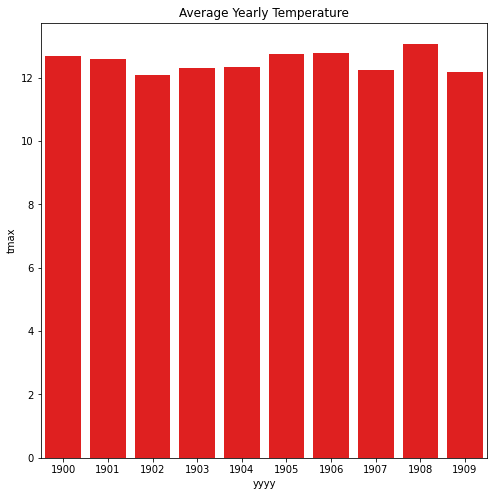

In [227]:
years_avg = int(input())   
plt.figure(figsize=(8,8))          
sb.barplot(data = yearly_avg_tmax.iloc[:years_avg],x ='yyyy',y='tmax',color='red')
plt.title("Average Yearly Max Temperature")

10


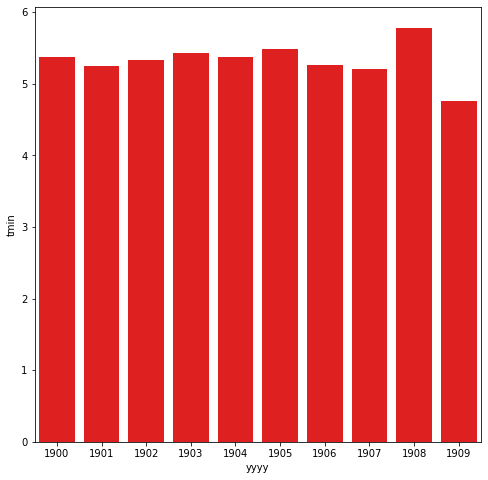

In [225]:
years_avg = int(input())   
plt.figure(figsize=(8,8))         
sb.barplot(data = yearly_avg_tmin[:years_avg],x ='yyyy',y='tmin',color='red')
plt.title("Average Yealy Minimum Temperature")

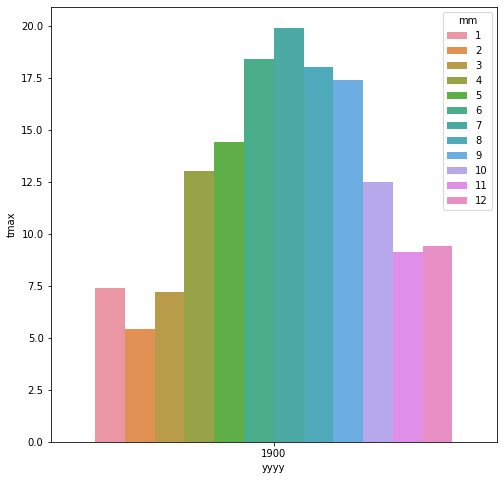

In [222]:
plt.figure(figsize=(8,8))
sb.barplot(data=montly_avg_tmax[:12],x ='yyyy',y='tmax',hue='mm')

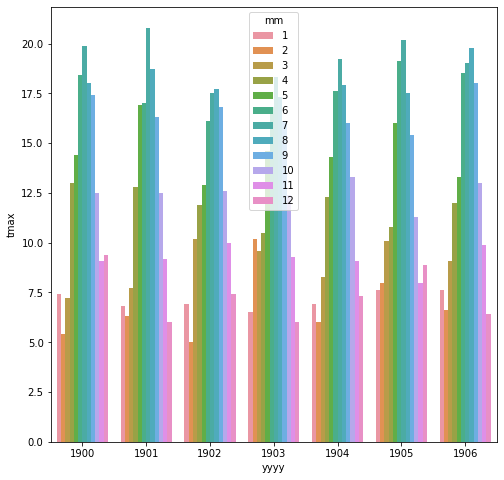

In [230]:
plt.figure(figsize=(8,8))
sb.barplot(data=montly_avg_tmax[:84],x ='yyyy',y='tmax',hue='mm')
plt.title("Monthly Averages of Max temperature")

Text(0.5, 1.0, 'Monthly Averages of Min temperature')

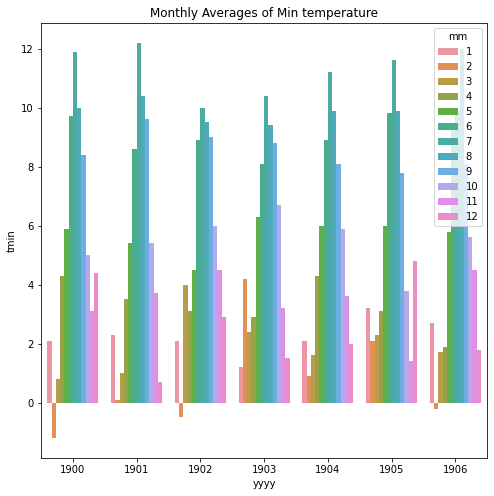

In [231]:
montly_avg_tmin = data_f.groupby(['yyyy','mm']).mean()['tmin'].reset_index()
plt.figure(figsize=(8,8))
sb.barplot(data=montly_avg_tmin[:84],x ='yyyy',y='tmin',hue='mm')
plt.title("Monthly Averages of Min temperature")

From the above it seems that:

1. Jan-Feb months have low temperatures as compared to other months.

2. Usually, jan-feb are winter months and from march-october spring and summer season starts. hence, it interprets winter season has low avg temp as compared to spring and summer seasons.

#### Precipitation

In [265]:
data_f1

,yyyy,mm,tmax,tmin,af,rain,sun
0,1853,1,---,---,---,57.3,---
1,1853,2,---,---,---,32.3,---
2,1853,3,---,---,---,65.5,---
3,1853,4,---,---,---,46.2,---
4,1853,5,---,---,---,13.2,---
...,...,...,...,...,...,...,...
2034,2022,7,20.7,12.8,0,24,99.3*
2035,2022,8,21.8,11.9,0,25.8,195.9*
2036,2022,9,18,10.2,0,111.2,123.3*
2037,2022,10,14.9,8.7,0,152,80.3*


In [272]:
data_f1['rain'].isnull().sum()

0

In [275]:
data_f1['rain'] = data_f1['rain'].apply(lambda x:x.replace('*',''))
data_f1['rain'] = data_f1['rain'].replace(' ---',0)

In [276]:
data_f1['rain'] = data_f1['rain'].apply(lambda x:float(x))

In [278]:
yearly_precipitation = data_f1.groupby('yyyy').mean()['rain'].reset_index()
yearly_precipitation

,yyyy,rain
0,1853,53.025000
1,1854,69.766667
2,1855,50.216667
3,1856,54.991667
4,1857,64.550000
...,...,...
165,2018,67.600000
166,2019,72.725000
167,2020,71.333333
168,2021,65.633333


In [280]:
yearly_precipitation.columns

Index(['yyyy', 'rain'], dtype='object')

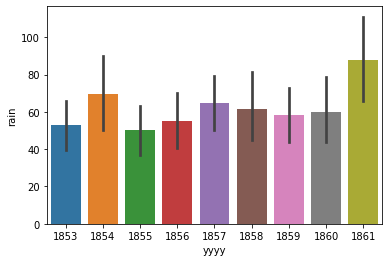

In [290]:
sb.barplot(data = data_f1[:108],x='yyyy',y='rain')

In [298]:
data_f1['sun'] = data_f1['sun'].apply(lambda x:x.replace('*',''))
data_f1['sun'] = data_f1['sun'].replace(' ---',np.nan)

In [299]:
data_f1['sun'] = data_f1['sun'].apply(lambda x:float(x))

In [303]:
yearly_sunshine = data_f1.groupby('yyyy').mean()['sun'].reset_index()
yearly_sunshine

,yyyy,sun
0,1853,NaN
1,1854,NaN
2,1855,NaN
3,1856,NaN
4,1857,NaN
...,...,...
165,2018,111.375000
166,2019,99.958333
167,2020,109.891667
168,2021,107.008333


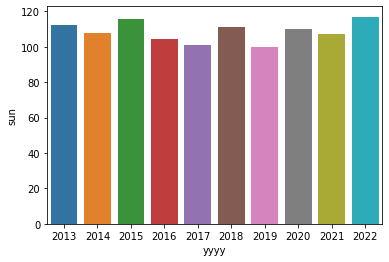

In [313]:
sb.barplot(data = yearly_sunshine[-10:],x='yyyy',y='sun')